In [117]:
import pandas as pd
import seaborn as sns
from functools import partial
import matplotlib.pyplot as plt
from datetime import timedelta

from src.traverser import (yield_groups,
                           get_optima_path,
                           generate_results_path,
                           generate_times_path)

In [2]:
read_csv = partial(pd.read_csv, sep=' ', header=None, index_col=0)

In [105]:
group = 'wuf20-91-A'
opt = get_optima_path(group)
times = generate_times_path(group)
results = generate_results_path(group)

read_csv(results).sample(5)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,,,,,,,,,,,,,,,,,,,,,
uf20-0278,0,0,0,39,-1,-2,-3,-4,-5,-6,...,-11,12,-13,14,15,16,-17,-18,-19,-20
uf20-0676,0,0,0,47,-1,-2,-3,-4,5,6,...,11,12,13,-14,-15,16,-17,-18,-19,-20
uf20-0973,0,0,0,109,-1,2,-3,4,5,-6,...,-11,-12,13,14,15,16,17,-18,-19,20
uf20-093,0,0,0,90,-1,2,3,4,-5,-6,...,-11,12,13,14,15,-16,-17,18,19,20
uf20-058,0,0,71,78,1,2,3,-4,-5,-6,...,11,12,13,14,-15,-16,17,18,-19,20


In [81]:
iteration_columns = ['n', 'nlogn', 'nn', 'nnn']
frames = []
keys = []

for group in sorted(yield_groups()):
    print(group)
    keys.append(group)
    
    frames.append(
    # display(
        pd.concat([
            read_csv(generate_times_path(group)).rename({1: 'time'}, axis=1),
            read_csv(get_optima_path(group)).rename({1: 'optimum'}, axis=1)['optimum'],
            read_csv(generate_results_path(group)).rename(
                {1: 'n', 2: 'nlogn', 3: 'nn', 4: 'nnn'},
                axis=1)[iteration_columns]
        ], axis=1)#.reset_index().rename({0: 'instance'}, axis=1)
    )

frame = pd.concat(frames, keys=keys).reset_index().rename(
    {'level_0': 'group', 0: 'instance'}, axis=1)

wuf20-78-M
wuf20-78-N
wuf20-78-Q
wuf20-78-R
wuf20-88-A
wuf20-91-A
wuf50-201-M
wuf50-201-N
wuf50-201-Q
wuf50-201-R


In [106]:
frame.sample(5)

,group,instance,time,optimum,n,nlogn,nn,nnn
1600,wuf20-78-N,uf20-065,0.212780,115626,1.0,0.045881,0.000000,0.000000
2196,wuf20-78-Q,uf20-0291,0.210134,1116,1.0,1.000000,0.000000,0.000000
39,wuf20-78-M,uf20-0133,0.167376,8786,1.0,1.000000,0.000000,0.000000
2438,wuf20-78-Q,uf20-0511,0.213035,8945,1.0,0.534600,0.104192,0.068753
1777,wuf20-78-N,uf20-0810,0.202564,21174,1.0,1.000000,0.000000,0.000000


In [84]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   group     4701 non-null   object 
 1   instance  4701 non-null   object 
 2   time      4701 non-null   float64
 3   optimum   4701 non-null   int64  
 4   n         4701 non-null   int64  
 5   nlogn     4701 non-null   int64  
 6   nn        4701 non-null   int64  
 7   nnn       4701 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 293.9+ KB


In [85]:
for col in iteration_columns:
    frame[col] = (frame.optimum - frame[col]) / frame.optimum 

In [86]:
frame.describe()

,time,optimum,n,nlogn,nn,nnn
count,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000
mean,0.425907,27823.114444,0.997418,0.767974,0.213345,0.018953
std,1.246644,36761.431406,0.044565,0.358329,0.344718,0.083608
min,0.163558,22.000000,0.138724,0.000000,0.000000,0.000000
25%,0.206740,3048.000000,1.000000,0.368578,0.000000,0.000000
50%,0.211298,8227.000000,1.000000,1.000000,0.034703,0.000000
75%,0.216563,45808.000000,1.000000,1.000000,0.228523,0.000000
max,10.256101,332318.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
frame.sample(5)

,group,instance,time,optimum,n,nlogn,nn,nnn
1388,wuf20-78-N,uf20-0459,0.211394,78880,1.0,0.188590,0.071970,0.0
3401,wuf20-78-R,uf20-0487,0.209024,61808,1.0,0.354048,0.000000,0.0
3227,wuf20-78-R,uf20-0327,0.218603,71466,1.0,1.000000,0.377760,0.0
2745,wuf20-78-Q,uf20-0790,0.223918,5343,1.0,1.000000,0.081041,0.0
269,wuf20-78-M,uf20-0343,0.213757,2593,1.0,1.000000,0.000000,0.0


In [116]:
print(timedelta(seconds=frame['time'].sum()))

0:33:22.188930


<AxesSubplot:xlabel='group', ylabel='time'>

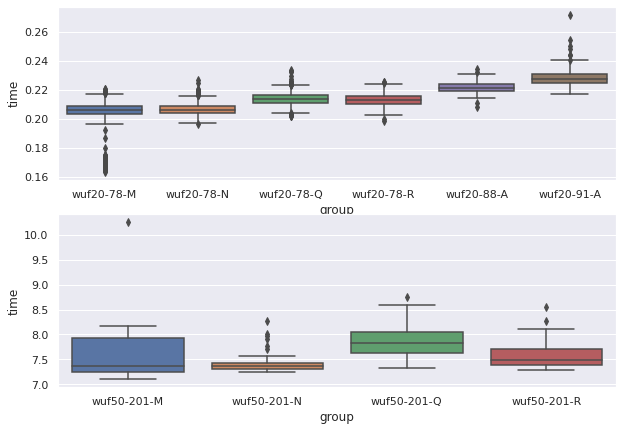

In [108]:
# Times
mask_20 = frame.group.str.contains('20-')
fig, axes = plt.subplots(2, 1)

sns.boxplot(x='group', y='time', data=frame[mask_20], ax=axes[0])
sns.boxplot(x='group', y='time', data=frame[~mask_20], ax=axes[1])

In [118]:
flat = pd.melt(frame,
        id_vars=['group', 'instance', 'time'],
        value_vars=iteration_columns,
        var_name='max_iteration',
        value_name='relative_error'
       )
flat

,group,instance,time,max_iteration,relative_error
0,wuf20-78-M,uf20-01,0.167498,n,1.000000
1,wuf20-78-M,uf20-010,0.166507,n,1.000000
2,wuf20-78-M,uf20-0100,0.168026,n,1.000000
3,wuf20-78-M,uf20-01000,0.166813,n,1.000000
4,wuf20-78-M,uf20-0101,0.169587,n,1.000000
...,...,...,...,...,...
18799,wuf50-201-R,uf50-0897,7.312883,nnn,0.237703
18800,wuf50-201-R,uf50-0920,7.385307,nnn,0.312885
18801,wuf50-201-R,uf50-0954,7.408255,nnn,0.136001
18802,wuf50-201-R,uf50-0957,7.511811,nnn,1.000000


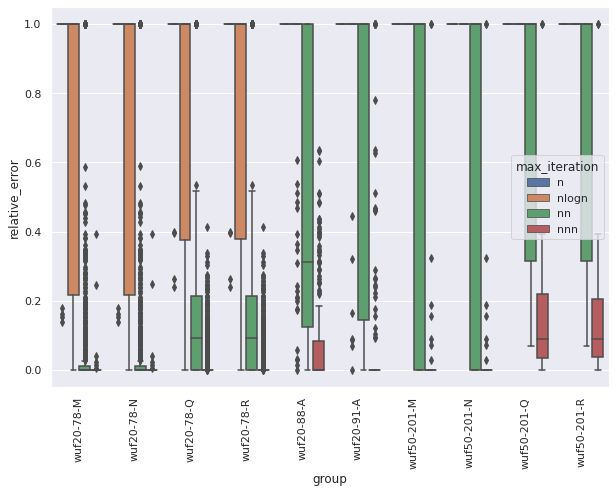

In [110]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.boxplot(x='group', y='relative_error', hue='max_iteration',
                 data=flat)
ax.tick_params(axis='x', rotation=90)

In [122]:
(flat.relative_error != 1).sum() / flat.shape[0]

0.5396724101255053

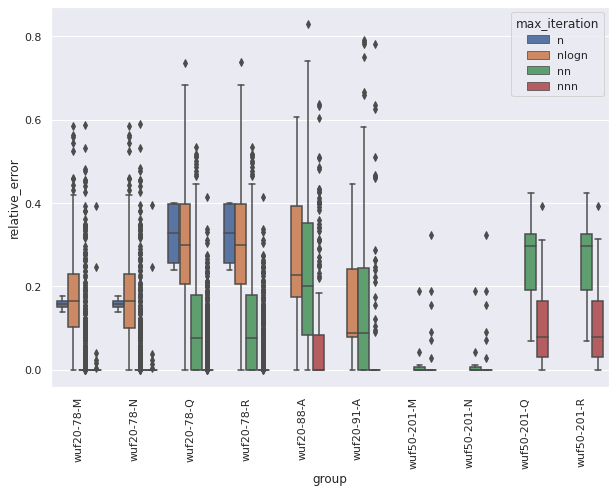

In [126]:
sns.boxplot(x='group', y='relative_error', hue='max_iteration',
            data=flat[flat.relative_error != 1]).tick_params(axis='x', rotation=90)